<a href="https://colab.research.google.com/github/HEKOCMOC/HPC_LAB/blob/main/VectorSum/VectorSum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
from __future__ import print_function
import numpy as np
from numba import njit, jit, int32, int64, cuda
import math
import sys
import pandas as pd

In [2]:
N = [1000, 10000, 100000, 500000, 1000000]
a0 = np.random.randint(-100, 100, N[0])
a1 = np.random.randint(-100, 100, N[1])
a2 = np.random.randint(-100, 100, N[2])
a3 = np.random.randint(-100, 100, N[3])
a4 = np.random.randint(-100, 100, N[4])
c1 = np.zeros(1, dtype=np.int32)

In [3]:
def cpu_vectorsum_numpy(x):
  y = np.sum(x)

In [4]:
s0 = time.time()
cpu_vectorsum_numpy(a0)
e0 = time.time() - s0
print('-------------------------------------')
print('Computation time on CPU: '+'%f' % (e0),'sec')
print('-------------------------------------')
s1 = time.time()
cpu_vectorsum_numpy(a1)
e1 = time.time() - s1
print('Computation time on CPU: '+'%f' % (e1),'sec')
print('-------------------------------------')
s2 = time.time()
cpu_vectorsum_numpy(a2)
e2 = time.time() - s2
print('Computation time on CPU: '+'%f' % (e2),'sec')
print('-------------------------------------')
s3 = time.time()
cpu_vectorsum_numpy(a3)
e3 = time.time() - s3
print('Computation time on CPU: '+'%f' % (e3),'sec')
print('-------------------------------------')
s4 = time.time()
cpu_vectorsum_numpy(a4)
e4 = time.time() - s4
print('Computation time on CPU: '+'%f' % (e4),'sec')
print('-------------------------------------')

-------------------------------------
Computation time on CPU: 0.000153 sec
-------------------------------------
Computation time on CPU: 0.000146 sec
-------------------------------------
Computation time on CPU: 0.000523 sec
-------------------------------------
Computation time on CPU: 0.005715 sec
-------------------------------------
Computation time on CPU: 0.005411 sec
-------------------------------------


In [5]:
threads_per_block = 16

In [6]:
@cuda.jit
def gpu_vectorsum(a, c):
  b = cuda.shared.array(threads_per_block, int64)

  idx = cuda.threadIdx.x + cuda.blockIdx.x * threads_per_block
  b[cuda.threadIdx.x] = 0

  if idx < a.shape[0]:
    b[cuda.threadIdx.x] = a[idx]
    cuda.syncthreads()
    if cuda.threadIdx.x == 0:
      sum = 0
      for i in range(threads_per_block):
        sum += b[i]
      cuda.atomic.add(c, 0, sum)

def main(a, c):
    dev_a = cuda.to_device(a)
    dev_c = cuda.to_device(c)
    gpu_vectorsum[threads_per_block, threads_per_block](dev_a, dev_c)
    c = dev_c.copy_to_host()

In [7]:
s5 = time.time()
main(a0, c1)
e5 = time.time() - s5
print('-------------------------------------')
print('Computation time on GPU: '+'%f' % (e5),'sec')
print('-------------------------------------')
s6 = time.time()
main(a1, c1)
e6 = time.time() - s6
print('Computation time on GPU: '+'%f' % (e6),'sec')
print('-------------------------------------')
s7 = time.time()
main(a2, c1)
e7 = time.time() - s7
print('Computation time on GPU: '+'%f' % (e7),'sec')
print('-------------------------------------')
s8 = time.time()
main(a3, c1)
e8 = time.time() - s8
print('Computation time on GPU: '+'%f' % (e8),'sec')
print('-------------------------------------')
s9 = time.time()
main(a4, c1)
e9 = time.time() - s9
print('Computation time on GPU: '+'%f' % (e9),'sec')
print('-------------------------------------')

-------------------------------------
Computation time on GPU: 0.991152 sec
-------------------------------------
Computation time on GPU: 0.003825 sec
-------------------------------------
Computation time on GPU: 0.003392 sec
-------------------------------------
Computation time on GPU: 0.002571 sec
-------------------------------------
Computation time on GPU: 0.003406 sec
-------------------------------------


In [8]:
def cpu_vectorsum(x):
  ans = np.empty_like(x)
  for i in range(len(x)):
    ans[i] += x[i]
  return ans

In [9]:
s01 = time.time()
cpu_vectorsum(a0)
end01 = time.time() - s01
print('-------------------------------------')
print('Computation time on CPU: '+'%f' %end01 , 'sec')
print('-------------------------------------')
s02 = time.time()
cpu_vectorsum(a1)
end02 = time.time() - s02
print('Computation time on CPU: '+'%f' %end02 , 'sec')
print('-------------------------------------')
s03 = time.time()
cpu_vectorsum(a2)
end03 = time.time() - s03
print('Computation time on CPU: '+'%f' %end03 , 'sec')
print('-------------------------------------')
s04 = time.time()
cpu_vectorsum(a3)
end04 = time.time() - s04
print('Computation time on CPU: '+'%f' %end04 , 'sec')
print('-------------------------------------')
s05 = time.time()
cpu_vectorsum(a4)
end05 = time.time() - s05
print('Computation time on CPU: '+'%f' %end05 , 'sec')
print('-------------------------------------')

-------------------------------------
Computation time on CPU: 0.000597 sec
-------------------------------------
Computation time on CPU: 0.005409 sec
-------------------------------------
Computation time on CPU: 0.052949 sec
-------------------------------------
Computation time on CPU: 0.270727 sec
-------------------------------------
Computation time on CPU: 0.532872 sec
-------------------------------------


In [10]:
timing_df = pd.DataFrame({'Name':['CPU', 'CPU(np.sum)', 'GPU', 'CPU', 'CPU(np.sum)', 'GPU', 'CPU', 'CPU(np.sum)', 'GPU', 'CPU', 'CPU(np.sum)', 'GPU', 'CPU', 'CPU(np.sum)', 'GPU'], 'Time(s)':[end01, e0, e5, end02, e1, e6, end03, e2, e7, end04, e3, e8, end05, e4, e9], 'Size N':[N[0], N[0], N[0], N[1], N[1], N[1], N[2], N[2], N[2], N[3], N[3], N[3], N[4], N[4], N[4]]})
timing_df = timing_df.sort_values(['Name'])
timing_df

,Name,Time(s),Size N
0,CPU,0.000597,1000
3,CPU,0.005409,10000
6,CPU,0.052949,100000
9,CPU,0.270727,500000
12,CPU,0.532872,1000000
1,CPU(np.sum),0.000153,1000
4,CPU(np.sum),0.000146,10000
7,CPU(np.sum),0.000523,100000
10,CPU(np.sum),0.005715,500000
13,CPU(np.sum),0.005411,1000000


In [16]:
acc = pd.DataFrame({'Acceleration (CPU/GPU)':['%f' %(end01/e5), '%f' %(end02/e6), '%f' %(end03/e7), '%f' %(end04/e8) , '%f' %(end04/e9)], 'Acceleration (CPU(np.sum)/GPU)':['%f' %(e0/e5), '%f' %(e1/e6), '%f' %(e2/e7), '%f' %(e3/e8) , '%f' %(e4/e9)]})
acc

,Acceleration (CPU/GPU),Acceleration (CPU(np.sum)/GPU)
0,0.000602,0.000155
1,1.413987,0.038270
2,15.612373,0.154165
3,105.315340,2.223057
4,79.484110,1.588758


In [12]:
import matplotlib.pyplot as plt

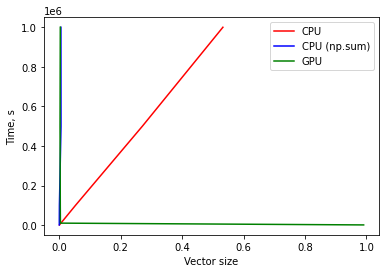

In [21]:
plt.plot([end01, end02, end03, end04, end05], N, color = 'red' , label = 'CPU')
plt.plot([e0, e1, e2, e3, e4], N, color = 'blue', label = 'CPU (np.sum)')
plt.plot([e5, e6, e7, e8, e9], N, color = 'green', label = 'GPU')
plt.rcParams['figure.facecolor'] = 'white'
plt.xlabel('Vector size')
plt.ylabel('Time, s')
plt.legend()